In [31]:
# Draw inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 20.0})
sns.set_context("poster", font_scale=0.6)

In [2]:
path = ''
train_users = pd.read_csv(path + 'train_users_2.csv')
test_users = pd.read_csv(path + 'test_users.csv')
sessions = pd.read_csv(path + 'sessions.csv')
countries = pd.read_csv(path + 'countries.csv')
age_gender = pd.read_csv(path + 'age_gender_bkts.csv')

In [3]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# Remove ID's since now we are not interested in making predictions
users.set_index('id',inplace=True)

In [9]:
users.loc

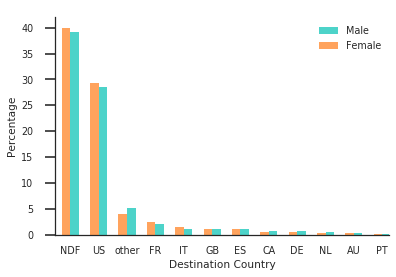

In [17]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.3

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [28]:
md=male_destinations.drop('other')
md=md.drop('NDF')

In [29]:
fd=female_destinations.drop('other')
fd=fd.drop('NDF')

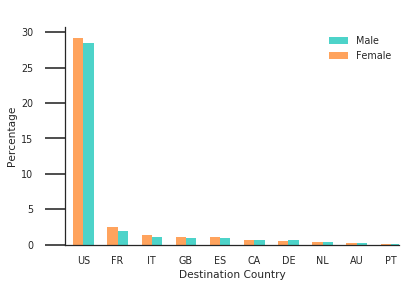

In [32]:
# Bar width
width = 0.3

md.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
fd.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

Text(0,0.5,'Percentage')

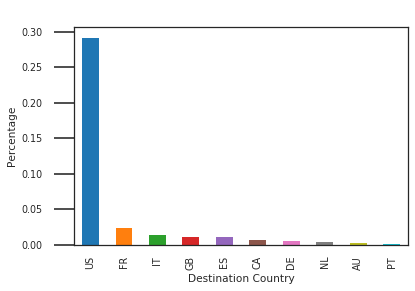

In [33]:
counts =  users.country_destination.value_counts(normalize=True)
cts=counts.drop('other')
cts=cts.drop('NDF')
cts.plot(kind='bar')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

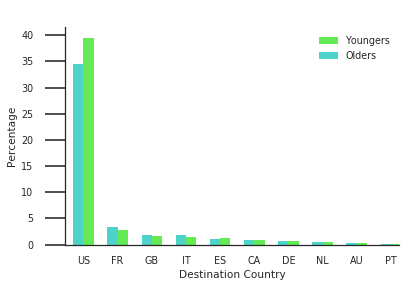

In [34]:
age = 50

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100
yd=younger_destinations.drop('NDF')
yd=yd.drop('other')
od=older_destinations.drop('NDF')
od=od.drop('other')
yd.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
od.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()